In [1]:
#Importing te necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file
df =  pd.read_csv(r"C:\Users\OJO MOSES\Desktop\COPY\nigeria_agricultural_exports.csv")

In [3]:
df

,Product Name,Company,Export Country,Date,Units Sold,unit_price,Profit per unit,Export Value,Destination Port,Transportation Mode
0,Rubber,Farmgate Nigeria Limited,Austria,11/16/2023,721,31443.05,5863.92,22670439.05,Lagos,Sea
1,Palm Oil,Prime Agro Exports Nigeria Limited,Germany,1/8/2021,881,23151.97,5868.73,20396885.57,Lagos,Sea
2,Cassava,Farmgate Nigeria Limited,Germany,10/14/2020,702,18536.45,5105.01,13012587.90,Calabar,Sea
3,Rubber,Nigerian Export Promotion Council (NEPC),Belgium,12/31/2022,191,21981.31,7781.54,4198430.21,Warri,Sea
4,Sesame,Nigeria Agro Export Company,France,12/19/2022,373,13415.94,9590.95,5004145.62,Lagos,Sea
...,...,...,...,...,...,...,...,...,...,...
995,Cashew,Nigeria Agro Export Company,Netherlands,6/11/2023,730,49937.99,9149.40,36454732.70,Warri,Sea
996,Rubber,Agro Export Nigeria Ltd,Sweden,11/1/2023,952,15607.62,5086.57,14858454.24,Lagos,Sea
997,Rubber,Agro Allied Exporters Nigeria Limited,Netherlands,8/6/2023,447,49544.50,6381.92,22146391.50,Lagos,Sea
998,Cashew,Greenfield Agro Exporters Nigeria Limited,Germany,3/5/2023,315,42814.92,6620.22,13486699.80,Lagos,Sea


In [4]:
#Checking the data size using the .shape function
df.shape

(1000, 10)

In [5]:
#Checking for duplicate
df.duplicated().sum()

0

In [6]:
#Checking for null value
df.isnull().sum()

Product Name           0
Company                0
Export Country         0
Date                   0
Units Sold             0
unit_price             0
Profit per unit        0
Export Value           0
Destination Port       0
Transportation Mode    0
dtype: int64

In [7]:
#Checking the data type
df.dtypes

Product Name            object
Company                 object
Export Country          object
Date                    object
Units Sold               int64
unit_price             float64
Profit per unit        float64
Export Value           float64
Destination Port        object
Transportation Mode     object
dtype: object

In [8]:
#Checking the descriptive analysis of the dataset
df.describe()

,Units Sold,unit_price,Profit per unit,Export Value
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,536.804000,30010.266660,6125.299550,1.631766e+07
std,251.311112,11515.423486,2269.844681,1.028734e+07
min,103.000000,10006.540000,2000.300000,1.323777e+06
25%,322.750000,20013.620000,4261.327500,7.669552e+06
50%,519.000000,30082.600000,6132.150000,1.441451e+07
75%,743.250000,39955.005000,8038.315000,2.262969e+07
max,999.000000,49985.860000,9990.570000,4.712082e+07


In [9]:
# Converting the data types 
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Getting the year column from date and changing the data type to datetime
df["Year"] = df["Date"].astype(str).str[:4]
df['Year'] = pd.to_datetime(df["Year"])


In [11]:
#Confirming the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product Name         1000 non-null   object        
 1   Company              1000 non-null   object        
 2   Export Country       1000 non-null   object        
 3   Date                 1000 non-null   datetime64[ns]
 4   Units Sold           1000 non-null   int64         
 5   unit_price           1000 non-null   float64       
 6   Profit per unit      1000 non-null   float64       
 7   Export Value         1000 non-null   float64       
 8   Destination Port     1000 non-null   object        
 9   Transportation Mode  1000 non-null   object        
 10  Year                 1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 86.1+ KB


In [12]:
#Top selling products by units sold
Top_products_by_units_sold = df.groupby("Product Name")["Units Sold"].sum().reset_index()
Top_products_by_units_sold.sort_values(by="Units Sold",ascending = False, inplace=True)
Top_products_by_units_sold

,Product Name,Units Sold
7,Sesame,76132
2,Cocoa,76129
0,Cashew,70833
6,Rubber,66641
5,Plantain,64863
1,Cassava,64234
4,Palm Oil,63879
3,Ginger,54093


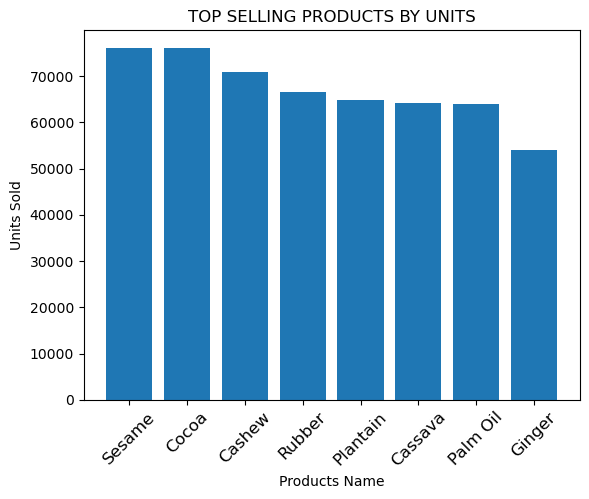

In [13]:
plt.bar(Top_products_by_units_sold["Product Name"], Top_products_by_units_sold["Units Sold"])
plt.xlabel('Products Name')
plt.ylabel('Units Sold')
plt.title('TOP SELLING PRODUCTS BY UNITS')
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [14]:
#Company with the highest sales
company_sales = df.groupby("Company")["Export Value"].sum().reset_index()
company_sales.sort_values(by="Export Value",ascending = False, inplace=True)
company_sales

,Company,Export Value
2,Agro Export Nigeria Ltd,1.867915e+09
4,Golden Farms Nigeria Limited,1.732721e+09
8,Prime Agro Exports Nigeria Limited,1.706072e+09
6,Nigeria Agro Export Company,1.704148e+09
7,Nigerian Export Promotion Council (NEPC),1.647088e+09
3,Farmgate Nigeria Limited,1.615238e+09
9,Solid Agro Nigeria Limited,1.541530e+09
5,Greenfield Agro Exporters Nigeria Limited,1.506893e+09
0,Agriplus Nigeria Limited,1.503023e+09
1,Agro Allied Exporters Nigeria Limited,1.493038e+09


In [15]:
#Creating Total profit and COGS(Cost of goods sold) columns.
df["Total Profit"] =  df["Units Sold"] * df["Profit per unit"]
df["COGS"] =  df["Export Value"] - df["Total Profit"]

In [16]:
#looking for the correlation between unit sold and total profit 
corr_matrix = df[['Units Sold', 'Total Profit']].corr()
corr_matrix

,Units Sold,Total Profit
Units Sold,1.000000,0.762933
Total Profit,0.762933,1.000000


<Axes: xlabel='Units Sold', ylabel='Total Profit'>

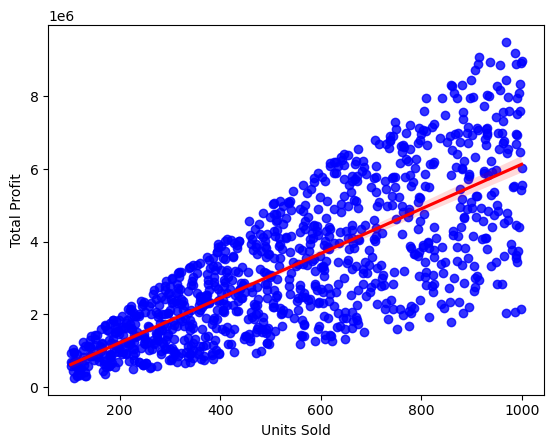

In [17]:
sns.regplot(x="Units Sold", y="Total Profit", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [42]:
#Checking for unit of goods sold across countries
Unit_sold_across_coutries = df.groupby(["Export Country"])["Units Sold"].sum().reset_index()
Unit_sold_across_coutries.sort_values(by="Units Sold",ascending = False, inplace=True)
Unit_sold_across_coutries

,Export Country,Units Sold
2,Denmark,59949
5,Italy,59769
3,France,56997
9,Switzerland,53929
8,Sweden,52187
0,Austria,51883
1,Belgium,51850
7,Spain,51450
6,Netherlands,50453
4,Germany,48337


In [19]:
#Checking for average sales across countries
Average_sales_across_coutries = df.groupby("Export Country")["Export Value"].mean().reset_index()
Average_sales_across_coutries.sort_values(by="Export Value",ascending = False, inplace=True)
Average_sales_across_coutries

,Export Country,Export Value
5,Italy,1.851497e+07
3,France,1.719870e+07
2,Denmark,1.649771e+07
9,Switzerland,1.647317e+07
1,Belgium,1.638476e+07
7,Spain,1.637350e+07
4,Germany,1.604990e+07
6,Netherlands,1.549857e+07
0,Austria,1.530521e+07
8,Sweden,1.467904e+07


In [20]:
#Checking for products' cost of goods sold
products_by_COGS = df.groupby("Product Name")["COGS"].sum().reset_index()
products_by_COGS.sort_values(by="COGS",ascending = False, inplace=True)
products_by_COGS

,Product Name,COGS
2,Cocoa,1.934537e+09
7,Sesame,1.791121e+09
6,Rubber,1.722279e+09
0,Cashew,1.672054e+09
4,Palm Oil,1.589193e+09
5,Plantain,1.559433e+09
1,Cassava,1.496805e+09
3,Ginger,1.263793e+09


In [21]:
#Checking for product's cost of goods sold (COGS) as a percentage of revenue.

df["COGS %"] = (df["COGS"]*100) / df["Export Value"]

products_by_COGS_percentage = df.groupby("Product Name")["COGS %"].mean().reset_index()
products_by_COGS_percentage.sort_values(by="COGS %",ascending = False, inplace=True)
products_by_COGS_percentage

,Product Name,COGS %
2,Cocoa,78.130876
6,Rubber,77.719458
5,Plantain,76.136415
4,Palm Oil,75.008537
0,Cashew,74.974859
3,Ginger,74.517507
7,Sesame,74.417608
1,Cassava,72.179254


In [22]:
# Which destination ports receive the highest volume of exports?

Volume_of_export_per_destination = df.groupby("Destination Port")["Units Sold"].sum().reset_index()
Volume_of_export_per_destination.sort_values(by="Units Sold",ascending = False, inplace=True)
Volume_of_export_per_destination

,Destination Port,Units Sold
1,Lagos,316417
3,Warri,79336
2,Port Harcourt,70736
0,Calabar,70315


In [23]:
# Ranking the destination port by the export value

Eport_value_per_destination = df.groupby("Destination Port")["Export Value"].sum().reset_index()
Eport_value_per_destination.sort_values(by="Export Value",ascending = False, inplace=True)
Eport_value_per_destination

,Destination Port,Export Value
1,Lagos,9.738667e+09
3,Warri,2.347900e+09
2,Port Harcourt,2.152910e+09
0,Calabar,2.078188e+09


In [24]:
# How does each product perform in terms of profit margin?

df["Profit margin"] = (df["Total Profit"]*100) / df["Export Value"]

products_by_profit_margin = df.groupby("Product Name")["Profit margin"].mean().reset_index()
products_by_profit_margin.sort_values(by="Profit margin",ascending = False, inplace=True)
products_by_profit_margin

,Product Name,Profit margin
1,Cassava,27.820746
7,Sesame,25.582392
3,Ginger,25.482493
0,Cashew,25.025141
4,Palm Oil,24.991463
5,Plantain,23.863585
6,Rubber,22.280542
2,Cocoa,21.869124


In [25]:
# companies perfomances based on units sold 
companys_unit_sold = df.groupby("Company")["Units Sold"].sum().reset_index()
companys_unit_sold.sort_values(by="Units Sold",ascending = False, inplace=True)
companys_unit_sold

,Company,Units Sold
4,Golden Farms Nigeria Limited,60724
2,Agro Export Nigeria Ltd,59944
7,Nigerian Export Promotion Council (NEPC),55833
6,Nigeria Agro Export Company,54717
0,Agriplus Nigeria Limited,52139
8,Prime Agro Exports Nigeria Limited,52035
3,Farmgate Nigeria Limited,52010
9,Solid Agro Nigeria Limited,51565
5,Greenfield Agro Exporters Nigeria Limited,50633
1,Agro Allied Exporters Nigeria Limited,47204


In [26]:
# companies performnaces based on profit generated
companys_profit_generated = df.groupby("Company")["Total Profit"].sum().reset_index()
companys_profit_generated.sort_values(by="Total Profit",ascending = False, inplace=True)
companys_profit_generated

,Company,Total Profit
2,Agro Export Nigeria Ltd,3.830520e+08
4,Golden Farms Nigeria Limited,3.713020e+08
7,Nigerian Export Promotion Council (NEPC),3.456396e+08
3,Farmgate Nigeria Limited,3.369663e+08
6,Nigeria Agro Export Company,3.256596e+08
8,Prime Agro Exports Nigeria Limited,3.156109e+08
9,Solid Agro Nigeria Limited,3.119486e+08
5,Greenfield Agro Exporters Nigeria Limited,3.092148e+08
0,Agriplus Nigeria Limited,3.062263e+08
1,Agro Allied Exporters Nigeria Limited,2.828292e+08


In [27]:
# Total revenue and toatl profit generaed by year.
Profit_by_year = df.groupby("Year")["Total Profit"].sum().reset_index()
Profit_by_year.sort_values(by="Total Profit",ascending = False, inplace=True)
Profit_by_year

Revenue_by_year = df.groupby("Year")["Export Value"].sum().reset_index()
Revenue_by_year.sort_values(by="Export Value",ascending = False, inplace=True)
print(Revenue_by_year)

print(Profit_by_year)

        Year  Export Value
1 2021-01-01  4.461998e+09
3 2023-01-01  4.187771e+09
0 2020-01-01  3.891727e+09
2 2022-01-01  3.776169e+09
        Year  Total Profit
1 2021-01-01  8.780467e+08
0 2020-01-01  8.376909e+08
3 2023-01-01  8.064950e+08
2 2022-01-01  7.662165e+08


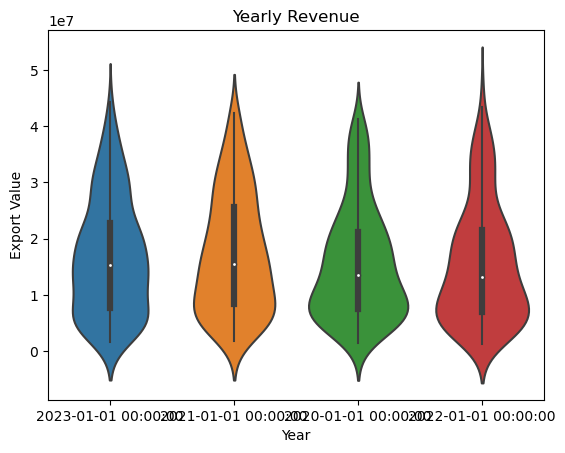

In [28]:
sns.violinplot(x="Year", y="Export Value", data=df)
plt.xlabel("Year")
plt.ylabel("Export Value")
plt.title("Yearly Revenue")
plt.show()

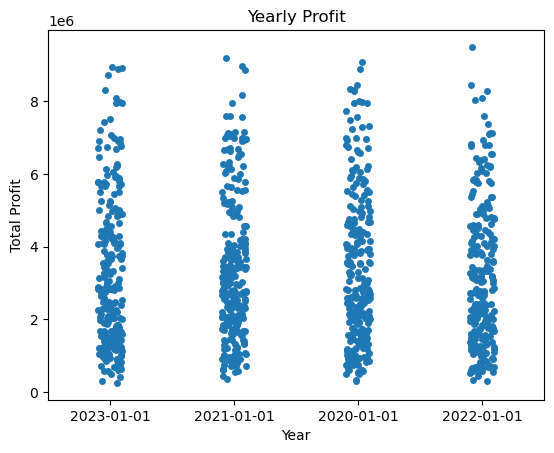

In [29]:
sns.stripplot(x="Year", y="Total Profit", data=df)
plt.xlabel("Year")
plt.ylabel("Total Profit")
plt.title("Yearly Profit")
plt.show()